<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/Temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 6113875

https://blog.naver.com/PostView.nhn?blogId=chai1226&logNo=221944798109&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView

https://github.com/alexvbogdan/DeepCalib.git

https://colab.research.google.com/github/alexvbogdan/DeepCalib.git

In [ ]:
! pip install tensorflow-graphics

     |████████████████████████████████| 4.3 MB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 46.0 MB/s 
     |████████████████████████████████| 646 kB 55.5 MB/s 
     |████████████████████████████████| 280 kB 41.6 MB/s 
     |████████████████████████████████| 462 kB 39.6 MB/s 
  Created wheel for OpenEXR: filename=OpenEXR-1.3.8-cp37-cp37m-linux_x86_64.whl size=189479 sha256=ea8af8de3a30702f75c9867b44ff836d976bf7932e27b0e0efd5c8b44c599b72
  Stored in directory: /root/.cache/pip/wheels/c9/2d/94/33b42ddc382c59626bbb75ad86575339decee5880dbbf7b182
Successfully built OpenEXR
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
#
from google.colab import files
src = list(files.upload().values())[0]

Saving .bazelrc to .bazelrc
Saving .flake8 to .flake8
Saving .gitignore to .gitignore
Saving .gitmodules to .gitmodules
Saving .pylintrc to .pylintrc
Saving CONTRIBUTING.md to CONTRIBUTING.md
Saving LICENSE to LICENSE
Saving MANIFEST.in to MANIFEST.in
Saving pytest.ini to pytest.ini
Saving README.md to README.md
Saving requirements.txt to requirements.txt
Saving requirements.unix to requirements.unix
Saving setup.py to setup.py
Saving WORKSPACE to WORKSPACE


In [ ]:
#
from google.colab import files
src = list(files.upload().values())[0]

Saving __init__.py to __init__.py
Saving orthographic.py to orthographic.py
Saving perspective.py to perspective.py
Saving quadratic_radial_distortion.py to quadratic_radial_distortion.py


In [ ]:
import quadratic_radial_distortion

In [ ]:
import perspective

error: 0.20
error: 0.04
error: 0.00
1.0 1.1500000000000001 0.8879057101562501


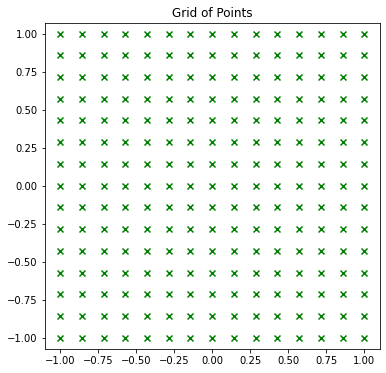

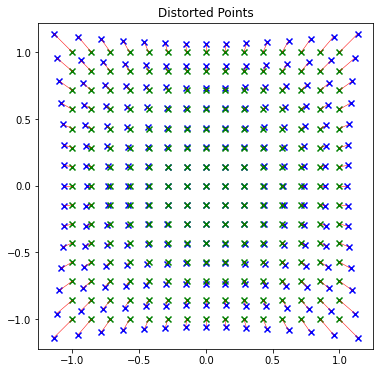

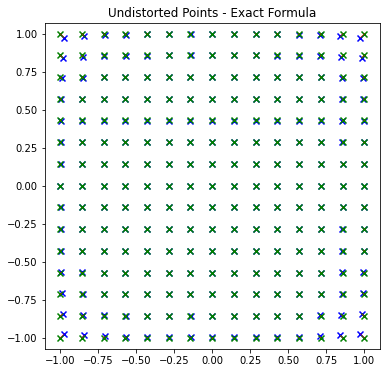

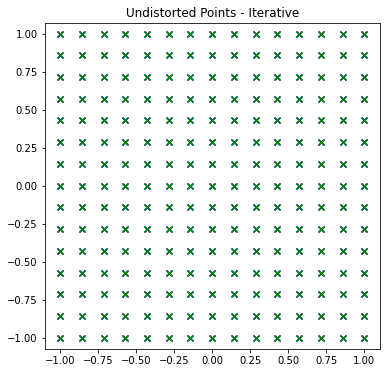

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def grid_2d(row, col):
    pts = np.zeros([2, row * col])
    cx, cy = (col - 1) * .5, (row - 1) * .5
    for i in range(row * col):
        pts[:, i] = i % col - cx, i // col - cy
    # pts in interval [-1,1]
    return pts / pts.max()

def apply_distortion(pts, k1, k2):
    r2 = np.square(pts).sum(0)
    f = 1 + k1 * r2 + k2 * r2**2
    return pts * f

def remove_distortion(pts, k1, k2):
    # as described in the paper
    b1, b2 = -k1, 3 * k1**2 - k2
    return apply_distortion(pts, b1, b2)

def remove_distortion_iter(points, k1, k2):
    # as used in e.g. matlab calibration tookit
    pts = ptsd = points
    for _ in range(5):
        r2 = np.square(pts).sum(0)
        f = 1 + k1 * r2 + k2 * r2**2
        pts = ptsd / f
    return pts

def plot_compare(ax, a, b, arrow=True):
    ax.scatter(*b, marker='x', c='b')
    ax.scatter(*a, marker='x', c='g')
    error = np.sqrt(np.square(a-b).sum(0).max())
    print('error: {:0.2f}'.format(error))
    if not arrow:
        return
    for (x, y), (bx, by) in zip(a.T, b.T):
        ax.plot([x, bx], [y, by], color='r', lw=0.5)

k1, k2 = 0.05, 0.01

pts = grid_2d(15, 15)
fig, ax = plt.subplots(1, figsize=[6,6])
ax.axis('equal')
ax.set_title('Grid of Points')
ax.scatter(*pts, marker='x', c='g');

d = apply_distortion(pts, k1, k2)
a, b = pts, d

fig, ax = plt.subplots(1, figsize=[6,6])
ax.axis('equal')
ax.set_title('Distorted Points')
plot_compare(ax, a, b)

u = remove_distortion(d, k1, k2)
a, b = pts, u

fig, ax = plt.subplots(1, figsize=[6,6])
ax.axis('equal')
ax.set_title('Undistorted Points - Exact Formula')
plot_compare(ax, a, b)

ui = remove_distortion_iter(d, k1, k2)
a, b = pts, ui

fig, ax = plt.subplots(1, figsize=[6,6])
ax.set_title('Undistorted Points - Iterative')
ax.axis('equal')
plot_compare(ax, a, b)

k1, k2 = 0.05, 0.1
b1, b2 = -k1, 3 * k1**2 - k2

# distort
r = 1.
r2 = r**2
r4 = r2**2
f = 1 + k1 * r2 + k2 * r4
r_prime = r*f

# undistort
r_p1 = r_prime
r_p2 = r_p1**2
r_p4 = r_p1**4
f_prime = 1 + b1 * r_p2 + b2 * r_p4

rr_prime = r_p1 * f_prime

# not actually inverting values...
print(r, r_prime, rr_prime)